In [18]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("ecg.csv")

df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [22]:
X=df.iloc[:,:-1].values
y=df.iloc[:,:-1].values

In [24]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [26]:
X_train,X_test=train_test_split(X_scaled,test_size=0.2,random_state=42)

In [28]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [32]:
input_layer=layers.Input(shape=(X_train.shape[1],1))
x=layers.Conv1D(32,3,activation='relu',padding='same')(input_layer)
x=layers.MaxPooling1D(2,padding='same')(x)
x=layers.Conv1D(16,3,activation='relu',padding='same')(x)
encoded=layers.MaxPooling1D(2,padding='same')(x)

x=layers.Conv1D(16,3,activation='relu',padding='same')(encoded)
x=layers.UpSampling1D(2)(x)
x=layers.Conv1D(32,3,activation='relu',padding='same')(x)
x=layers.UpSampling1D(2)(x)

decoded= layers.Conv1D(1,3,activation='sigmoid',padding='same')(x)

In [35]:
autoencoder=models.Model(input_layer,decoded)

encoder=models.Model(input_layer,encoded)

autoencoder.compile(optimizer='adam',loss='mse',metrics=['accuracy'])


In [37]:
history=autoencoder.fit(X_train,X_train,epochs=10,batch_size=128,validation_data=(X_test,X_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0000e+00 - loss: 0.6991 - val_accuracy: 0.0000e+00 - val_loss: 0.7023
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 0.6152 - val_accuracy: 0.0000e+00 - val_loss: 0.6890
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.6242 - val_accuracy: 0.0000e+00 - val_loss: 0.6849
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 0.6312 - val_accuracy: 0.0000e+00 - val_loss: 0.6829
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 0.5994 - val_accuracy: 0.0000e+00 - val_loss: 0.6815
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 0.6138 - val_accuracy: 0.0000e+00 - val_loss: 0.6801
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.6068 - val_accuracy: 0.0000e+00 - val_loss: 0.6790
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - ac

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


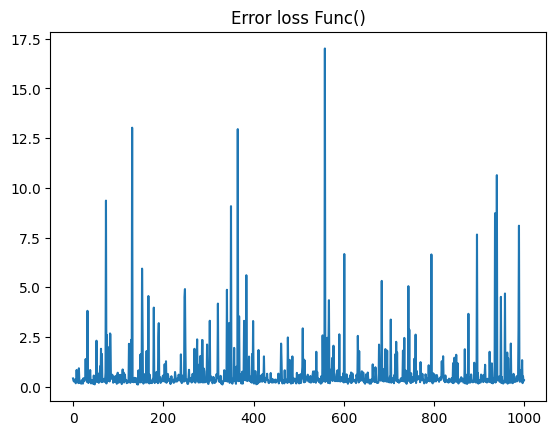

[ 32  73  75  82  83 131 153 154 167 179 189 190 247 248 275 303 321 341
 346 350 365 368 379 384 399 476 509 553 558 562 564 567 590 601 631 684
 704 734 743 745 759 794 876 895 935 939 948 957 987 988]


In [42]:
error=autoencoder.predict(X_test)
recon_error = np.mean(np.power(X_test-error,2),axis=1)

threshold=np.percentile(recon_error,95)

anomalies=recon_error > threshold

plt.plot(recon_error)
plt.title("Error loss Func()")
plt.show()


print(np.where(anomalies)[0])